In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

df=pd.read_excel("Genshin Impact Revenue.xlsx")
df.dropna(inplace=True)

X = df[['Avg Revenue/Day','Revenue']]

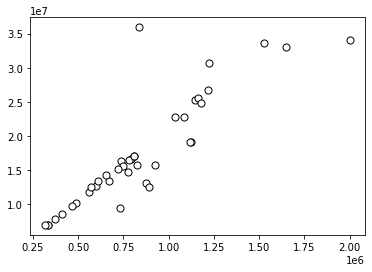

In [9]:
# Scatter plot
plt.scatter(
   X.iloc[:, 0], X.iloc[:, 1],
   c='white', marker='o',
   edgecolor='black', s=50
)
plt.show()

[0 0 1 1 2 1 1 2 1 1 2 2 1 2 2 1 2 0 2 2 0 1 1 1 0 1 0 0 0 0 1 0 1 1 1 1 1
 0 1]


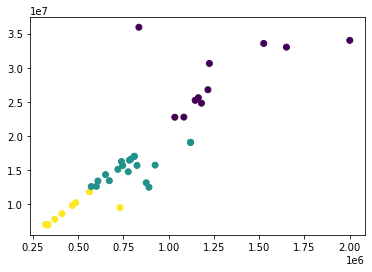

In [10]:
# Train K-Means clustering
km = KMeans(
    n_clusters=3, init='k-means++',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0)

y_km = km.fit_predict(X)
print(y_km)

plt.scatter(X.iloc[:,0],X.iloc[:,1],c=y_km)

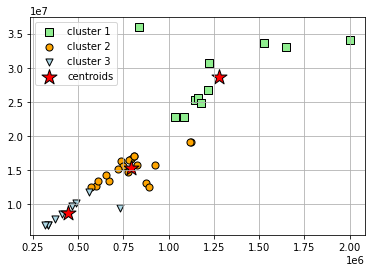

In [11]:
# Plot the clusters
plt.scatter(
    X.iloc[y_km == 0, 0], X.iloc[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X.iloc[y_km == 1, 0], X.iloc[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X.iloc[y_km == 2, 0], X.iloc[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [12]:
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

print(distortions)

C:\Users\LENOVO\Downloads\Anaconda 3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[2489401737122591.5, 598483966657044.1, 336732165123649.0, 132799031771097.44, 66395648381242.83, 50958509158676.125, 39926784774978.016, 30790229806656.652, 19758505422958.54, 14821840734413.0]


In [21]:
# Elbow

from kneed import KneeLocator
kl = KneeLocator(range(1, 11), distortions, curve="convex", direction="decreasing")
kl.elbow

2

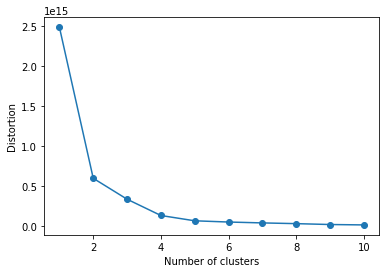

In [22]:
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()